<a href="https://colab.research.google.com/github/BerkKarakutuk88/artificial_neural_network_capstone/blob/main/artificial_neural_network_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
df = pd.read_csv("disleksinormalhepsi.csv", sep=';')
df.head()

,name,type,session,T_AF3,T_F3,T_F7,T_FC5,T_T7,T_P7,T_O1,...,G_O1,G_O2,G_P8,G_T8,G_FC6,G_F8,G_F4,G_AF4,Unnamed: 73,Unnamed: 74
0,ada2006,0,1,2.88,1.62,2.96,2.16,1.34,2.32,4.24,...,0.28,0.26,0.42,0.27,0.27,0.49,0.29,0.43,NaN,NaN
1,ada2006,0,2,2.73,1.71,2.76,2.25,1.64,2.55,2.38,...,0.21,0.25,0.44,0.23,0.24,0.35,0.28,0.39,NaN,NaN
2,ada2006,0,3,5.72,5.82,5.26,5.71,0.70,5.29,0.44,...,0.07,0.51,0.05,0.05,0.10,0.20,0.23,0.04,NaN,NaN
3,ada2006,0,4,4.23,3.84,4.25,4.02,3.08,1.08,0.50,...,0.03,0.18,0.26,0.36,0.41,0.34,0.36,0.33,NaN,NaN
4,ada2006,0,5,1.99,0.25,2.08,2.11,1.90,2.41,2.13,...,0.13,0.03,0.03,0.09,0.12,0.07,0.06,0.13,NaN,NaN


In [ ]:
df = df.drop(['name', 'session', 'Unnamed: 73', 'Unnamed: 74'], axis=1)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, 0].values

In [ ]:
print(X)

[[2.88 1.62 2.96 ... 0.27 0.49 0.29]
 [2.73 1.71 2.76 ... 0.24 0.35 0.28]
 [5.72 5.82 5.26 ... 0.1  0.2  0.23]
 ...
 [6.77 3.68 9.38 ... 0.46 0.34 0.04]
 [3.96 5.87 1.79 ... 0.76 0.78 0.19]
 [9.4  8.91 5.08 ... 0.21 0.26 0.15]]


In [ ]:
print(y)

[0 0 0 ... 1 1 1]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
521/521 [==============================] - 4s 4ms/step - loss: 0.4803 - accuracy: 0.7714
Epoch 2/100
521/521 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8535
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.8824
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.9060
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.9223
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.1818 - accuracy: 0.9383
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.1610 - accuracy: 0.9451
Epoch 8/100
521/521 [==============================] - 1s 2ms/step - loss: 0.1458 - accuracy: 0.9519
Epoch 9/100
521/521 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9595
Epoch 10/100
521/521 [==============================] - 1s 2ms/step - loss: 0.1213 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

131/131 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

[[1911   53]
 [  29 2171]]


0.9803073967339097

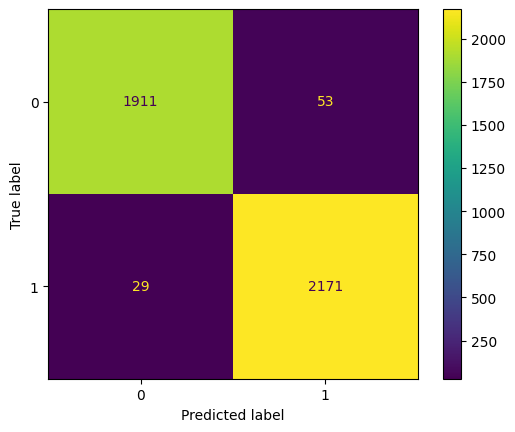

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
accuracy_score(y_test, y_pred)